## Homework 03: Modeling voter turnout

### MACS 30100 Perspectives on Computational Modeling, Dr. Soltoff

Ellen Hsieh

26 Jan 2019

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [2]:
mh = pd.read_csv('./data/mental_health.csv').dropna()

In [4]:
# split the data into training/testing set
xs = mh[['mhealth_sum', 'age', 'educ', 'black', 'female', 'married', 'inc10']].values
x_train, x_test, y_train, y_test = train_test_split(xs, mh['vote96'].values, train_size=0.7, random_state=124)

In [5]:
models = []
# Logistic regression model
logit = LogisticRegression().fit(x_train, y_train)
models.append(('Logit', logit))

# Linear discriminant model
lda = LinearDiscriminantAnalysis().fit(x_train, y_train)
models.append(('LDA', lda))

# Quadratic discriminant model
qda = QuadraticDiscriminantAnalysis().fit(x_train, y_train)
models.append(('QDA', qda))

# Naive Bayes
nb = GaussianNB().fit(x_train, y_train)
models.append(('NB', nb))

# K-nearest neighbors with k = 1~10
for k in range(1,11):
    models.append(('KNN_{}'.format(k), KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)))

In [6]:
# create the list for prediction, prediction_probability, names of the models
probs = []
preds = []
names = []

for name, model in models:
    probs.append(model.predict_proba(x_test))
    preds.append(model.predict(x_test))
    names.append(name)

([<matplotlib.axis.XTick at 0x10b82db38>,
 <a list of 14 Text xticklabel objects>)

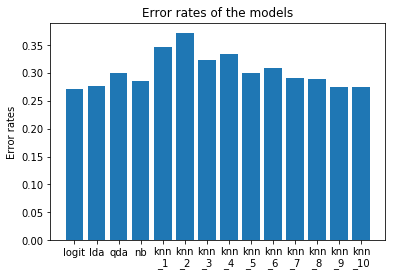

In [7]:
# calculate the error rates of the models
error_rates = [ (1 - accuracy_score(y_test, pred)) for pred in preds]

# plot the error rates of the models
bars = ('logit', 'lda', 'qda', 'nb', 'knn\n_1', 'knn\n_2', 'knn\n_3', 'knn\n_4', 
        'knn\n_5', 'knn\n_6', 'knn\n_7', 'knn\n_8', 'knn\n_9', 'knn\n_10')
x = np.arange(len(bars))
plt.bar(x, error_rates)
plt.ylabel('Error rates')
plt.title('Error rates of the models')
plt.xticks(x, bars)

([<matplotlib.axis.XTick at 0x1a1f55e940>,
 <a list of 14 Text xticklabel objects>)

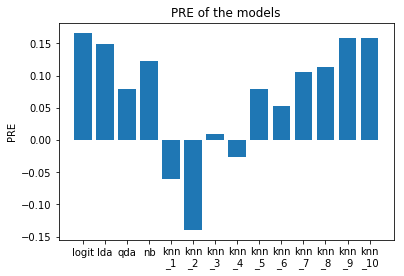

In [8]:
# calculate the PRE of the models
err_null = 1 - sum(y_test) / len(y_test)
pres = [(err_null - err) / err_null for err in error_rates]

# plots the PRE of the models
x = np.arange(len(bars))
plt.bar(x, pres)
plt.ylabel('PRE')
plt.title('PRE of the models')
plt.xticks(x, bars)

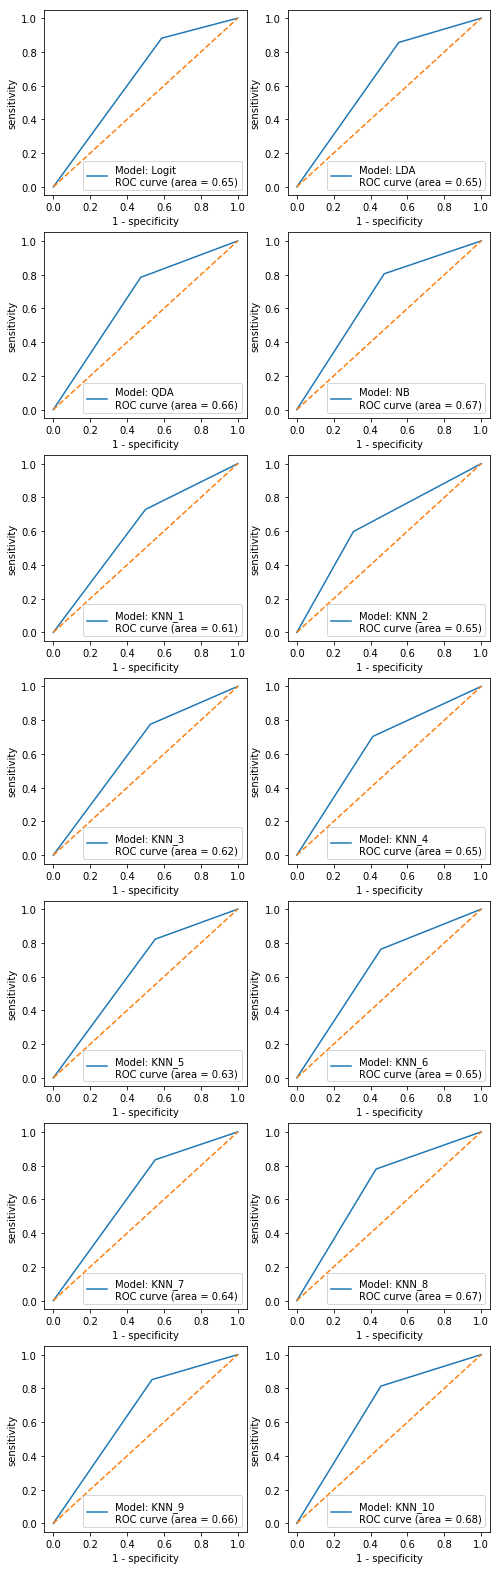

In [9]:
# calculate ROC and AUC of the models
rocs = []
aucs = []
for pred in preds:
    fpr, tpr, _ = roc_curve(y_test, pred)
    rocs.append((fpr, tpr))
    aucs.append(auc(fpr, tpr))
    
# plot ROC and AUC of the models    
fig = plt.figure(figsize=(8, 28))
for i, roc in enumerate(rocs):
    ax = fig.add_subplot(7, 2, i+1)
    ax.plot(roc[0], roc[1] , label='Model: '+ names[i] +
            '\nROC curve (area = {:.2f})'.format(aucs[i]))
    ax.plot([0, 1], [0, 1], linestyle='--')
    ax.legend()
    plt.xlabel('1 - specificity')
    plt.ylabel('sensitivity')

For me, the "best" model is the one that has the highest accuracy on the testing data. In other words, the model should have low error rate, high PRE and high AUC. From the previous analyses of the different models, the Logistic model performs the best on the given testing data, which has lowest error rate, highest PRE and highest AUC.